# Kaggle competition assignment

## Hao Wu - 001443861

---
**License**
This project is licensed under [MIT License](https://raw.githubusercontent.com/22557i/INFO7390AdvancedDataScience/master/Assignment2/license.txt),  
all credits to Hao Wu.


**Link**
Google Colab:\
Kaggle competition:https://www.kaggle.com/c/sberbank-russian-housing-market

## Abstract


**Background**\
Housing costs demand a significant investment from both consumers and developers. And when it comes to planning a budget—whether personal or corporate—the last thing anyone needs is uncertainty about one of their biggets expenses. Sberbank, Russia’s oldest and largest bank, helps their customers by making predictions about realty prices so renters, developers, and lenders are more confident when they sign a lease or purchase a building.

Although the housing market is relatively stable in Russia, the country’s volatile economy makes forecasting prices as a function of apartment characteristics a unique challenge. Complex interactions between housing features such as number of bedrooms and location are enough to make pricing predictions complicated. Adding an unstable economy to the mix means Sberbank and their customers need more than simple regression models in their arsenal.

In this competition, Sberbank is challenging Kagglers to develop algorithms which use a broad spectrum of features to predict realty prices. Competitors will rely on a rich dataset that includes housing data and macroeconomic patterns. An accurate forecasting model will allow Sberbank to provide more certainty to their customers in an uncertain economy.

**Competition**\
This competition looks for the model to predict the house price in Russia.
Here are the main variables below
**Dictionary**

price_doc: sale price (this is the target variable)\
id: transaction id\
timestamp: date of transaction\
full_sq: total area in square meters, including loggias, balconies and other non-residential areas\
life_sq: living area in square meters, excluding loggias, balconies and other non-residential areas\
floor: for apartments, floor of the building\
max_floor: number of floors in the building\
material: wall material\
build_year: year built\
num_room: number of living rooms\
kitch_sq: kitchen area\
state: apartment condition\
product_type: owner-occupier purchase or investment\
sub_area: name of the district
**Idea in other kernel**\

Other kernels focus on feature engineering. They hope to extract most significant features to price of houses from dataset. A part of kernels do prediction with Xgboost model. I'm going to use different regressor to train several prediction models(Linear regression, SVM, Random Forest Regression and GridSearchCV based on Xgboost.
I'll compare model performance based on RMSE and R2_score.

In [22]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection, preprocessing
from sklearn.model_selection import KFold, cross_val_score, train_test_split
import datetime as dt
import xgboost as xgb

%matplotlib inline

In [23]:
train_data = pd.read_csv('https://raw.githubusercontent.com/22557i/INFO7390AdvancedDataScience/master/Assignment2/train-data.csv')
test_data = pd.read_csv('https://raw.githubusercontent.com/22557i/INFO7390AdvancedDataScience/master/Assignment2/test-data.csv')

In [24]:
train_data.describe()

,id,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
count,30471.000000,30471.000000,24088.000000,30304.000000,20899.000000,20899.000000,1.686600e+04,20899.000000,20899.000000,16912.000000,...,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,3.047100e+04
mean,15237.917397,54.214269,34.403271,7.670803,12.558974,1.827121,3.068057e+03,1.909804,6.399301,2.107025,...,32.058318,10.783860,1.771783,15.045552,30.251518,0.442421,8.648814,52.796593,5.987070,7.123035e+06
std,8796.501536,38.031487,52.285733,5.319989,6.756550,1.481154,1.543878e+05,0.851805,28.265979,0.880148,...,73.465611,28.385679,5.418807,29.118668,47.347938,0.609269,20.580741,46.292660,4.889219,4.780111e+06
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000e+00,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+05
25%,7620.500000,38.000000,20.000000,3.000000,9.000000,1.000000,1.967000e+03,1.000000,1.000000,1.000000,...,2.000000,1.000000,0.000000,2.000000,9.000000,0.000000,0.000000,11.000000,1.000000,4.740002e+06
50%,15238.000000,49.000000,30.000000,6.500000,12.000000,1.000000,1.979000e+03,2.000000,6.000000,2.000000,...,8.000000,2.000000,0.000000,7.000000,16.000000,0.000000,2.000000,48.000000,5.000000,6.274411e+06
75%,22855.500000,63.000000,43.000000,11.000000,17.000000,2.000000,2.005000e+03,2.000000,9.000000,3.000000,...,21.000000,5.000000,1.000000,12.000000,28.000000,1.000000,7.000000,76.000000,10.000000,8.300000e+06
max,30473.000000,5326.000000,7478.000000,77.000000,117.000000,6.000000,2.005201e+07,19.000000,2014.000000,33.000000,...,377.000000,147.000000,30.000000,151.000000,250.000000,2.000000,106.000000,218.000000,21.000000,1.111111e+08


In [25]:
print(train_data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30471 entries, 0 to 30470
Columns: 292 entries, id to price_doc
dtypes: float64(119), int64(157), object(16)
memory usage: 67.9+ MB
None


## Data visualization

1.do a scatter plot to see if there are any outliers in the data.

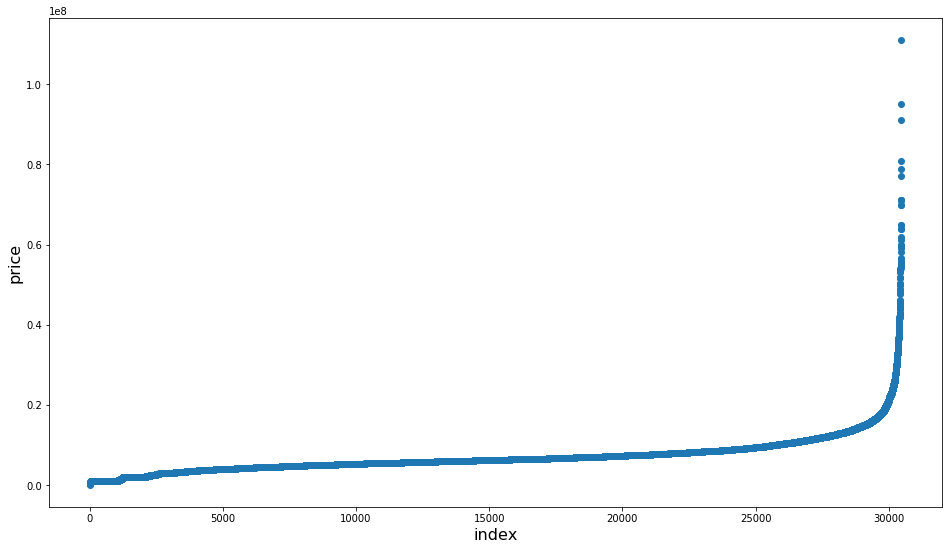

In [26]:
plt.figure(figsize=(16,9))
plt.scatter(range(train_data.shape[0]), np.sort(train_data.price_doc.values))
plt.xlabel('index', fontsize=16)
plt.ylabel('price', fontsize=16)
plt.show()

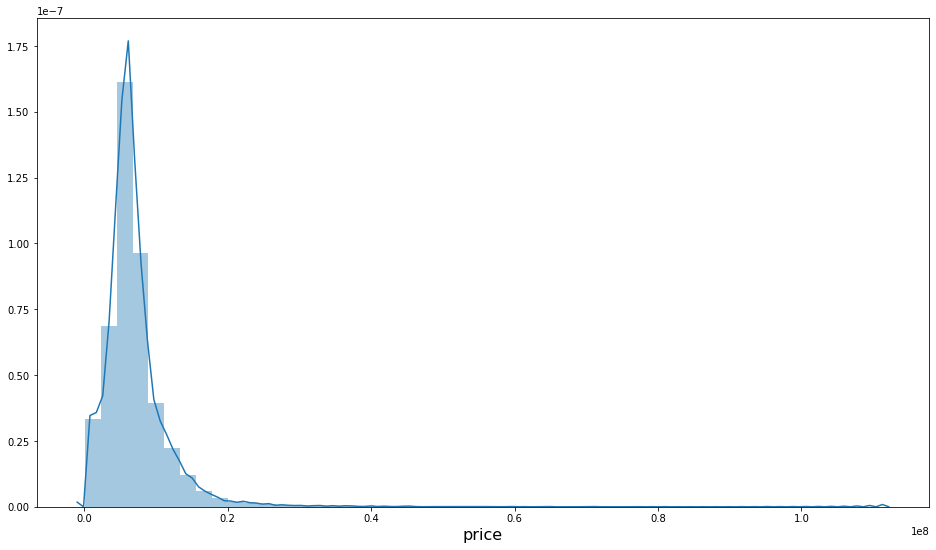

In [27]:
plt.figure(figsize=(16,9))
sns.distplot(train_data.price_doc.values, bins=50, kde=True)
plt.xlabel('price', fontsize=16)
plt.show()

I'm going to us metric is Root Mean Square Logarithmic error, so I will plot the log of price_doc variable.

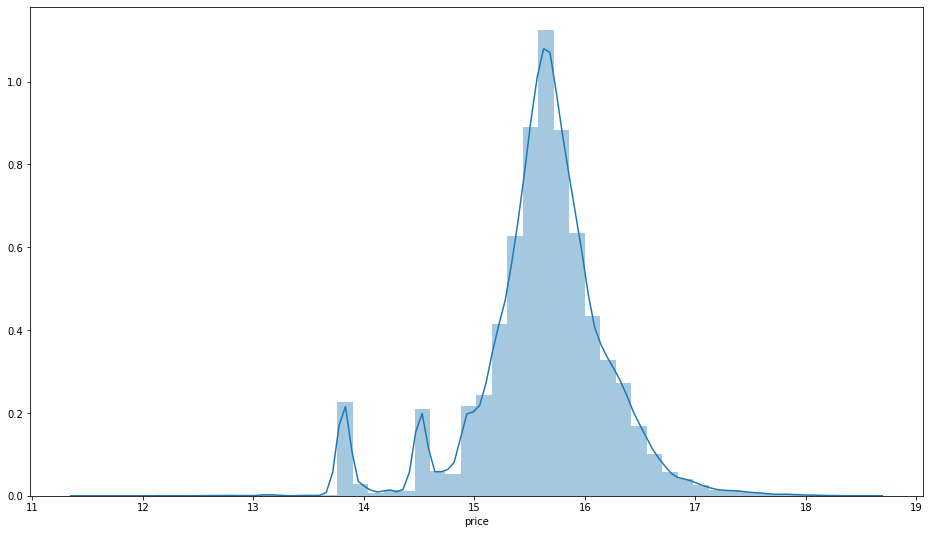

In [28]:
plt.figure(figsize=(16,9))
sns.distplot(np.log(train_data.price_doc.values), bins=50, kde=True)
plt.xlabel('price')
plt.show()

---
**Floor:**

Count plot of floor variable.

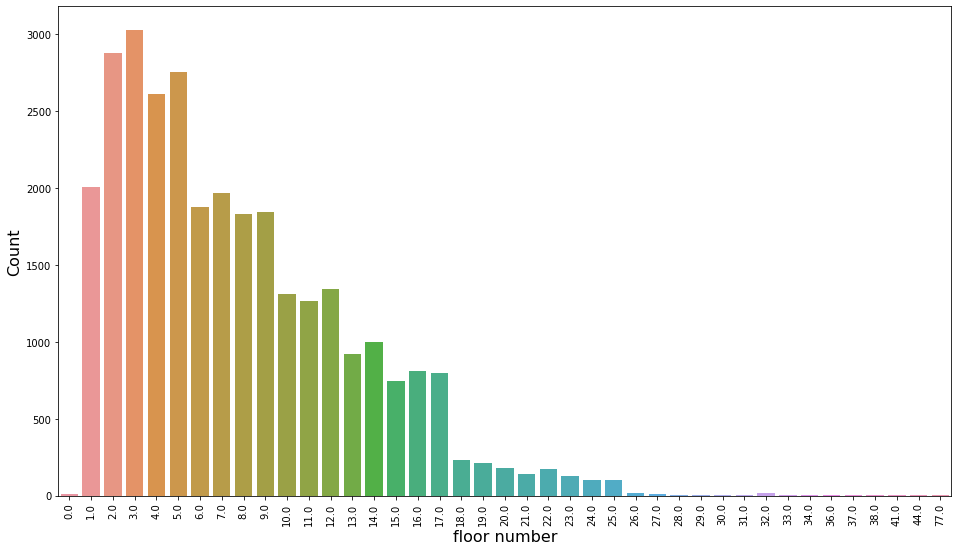

In [29]:
plt.figure(figsize=(16,9))
sns.countplot(x='floor', data=train_data)
plt.ylabel('Count', fontsize=16)
plt.xlabel('floor number', fontsize=16)
plt.xticks(rotation='vertical')
plt.show()

There are some good drops in between (5 to 6, 9 to 10, 12 to 13, 17 to 18). And here is the graph shows how the price changes with respect to floors.


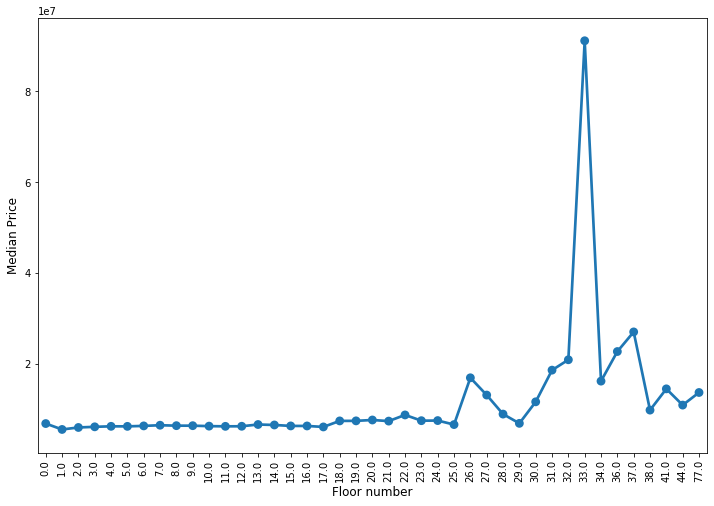

In [30]:

temp_df = train_data.groupby(['floor'])['price_doc'].aggregate(np.median).reset_index()
plt.figure(figsize=(12,8))
sns.pointplot(x='floor', y='price_doc', data=temp_df)
plt.ylabel('Median Price', fontsize=12)
plt.xlabel('Floor number', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()


Do little data cleaning:
Because there are lots of null value in dataset, I replaced these null value from a specfic number -99.

In [31]:
train_data.fillna(-99, inplace=True)
test_data.fillna(-99, inplace=True)

Split the year, month and day data from "timestamp".

In [32]:
def time_stamp(df):
    df["timestamp"] = pd.to_datetime(df["timestamp"])
    df["year"] = df["timestamp"].dt.year
    df["month"] =  df["timestamp"].dt.month
    df["day"] = df["timestamp"].dt.day 
    del df["timestamp"]

time_stamp(train_data)
time_stamp(test_data)



train_cont = [x for x in train_data.columns if train_data.dtypes[x] != 'object' and (x not in ['day','month','year'])]
test_cont = [x for x in test_data.columns if test_data.dtypes[x] != 'object' and (x not in ['day','month','year'])]

I'll use Correlation matrix and xgboost to indentify top features related to "price_doc"

[15:32:51] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[15:32:51] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:33:10] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.


<function matplotlib.pyplot.show(*args, **kw)>

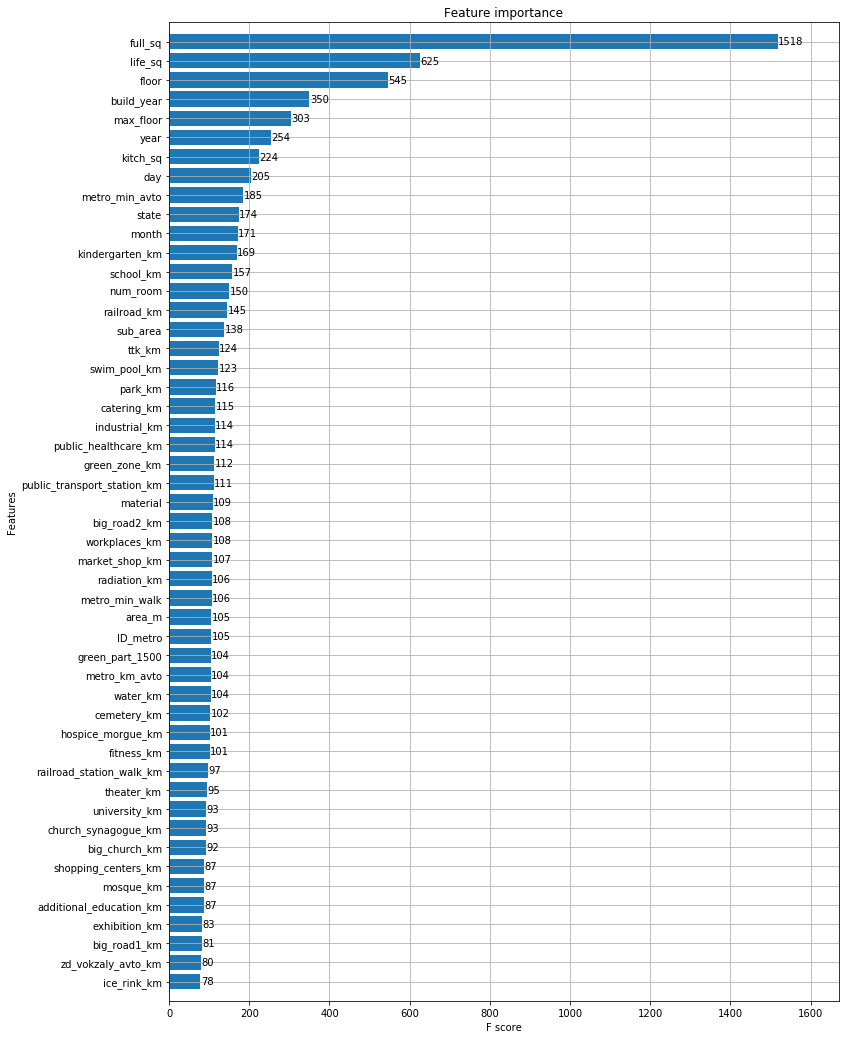

In [33]:
for f in train_data:
    if train_data[f].dtype == "object":
        lbl=preprocessing.LabelEncoder()
        lbl.fit(list(train_data[f].values))
        train_data[f]=lbl.transform(list(train_data[f].values))

xgb_params = {
    'eta': 0.05,
    'max_depth': 8,
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'objective': 'reg:linear',
    'eval_metric': 'rmse',
    'silent': 1
}

y_train = train_data["price_doc"]
x_train = train_data.drop(["id","price_doc"],axis = 1)
dtrain = xgb.DMatrix(x_train,y_train,feature_names = x_train.columns.values)
model = xgb.train(dict(xgb_params,silent=0),dtrain,num_boost_round=100)

fig,ax=plt.subplots(figsize = (12,18))
xgb.plot_importance(model, max_num_features=50, height=0.8, ax=ax)
plt.show

In [34]:
pd.DataFrame(train_data.corr()["price_doc"].sort_values(ascending=False))

,price_doc
price_doc,1.000000
full_sq,0.341840
sport_count_5000,0.294864
sport_count_3000,0.290651
trc_count_5000,0.289371
...,...
ttk_km,-0.272620
bulvar_ring_km,-0.279158
kremlin_km,-0.279249
sadovoe_km,-0.283622


According to the correlation I decide to drop some varaiables which have lower correlation with the price.

In [35]:
 del_low_corr = ["trc_sqm_5000","prom_part_500","build_count_1971-1995",
               "school_quota","ID_railroad_station_walk","cemetery_km","water_km",
               "big_church_count_500","cafe_sum_3000_max_price_avg",
               "cafe_avg_price_3000","cafe_sum_3000_min_price_avg",
               "build_count_1921-1945","16_29_male",
               "female_f","full_all","ID_bus_terminal","ID_railroad_station_avto",
               "ID_big_road1","ID_big_road2","trc_count_500","trc_count_1000",
               "trc_sqm_1500","cafe_count_500_price_4000","cafe_count_500_price_2500",
               "market_count_5000","hospital_beds_raion",
               "cafe_avg_price_500","cafe_sum_500_max_price_avg",
               "cafe_sum_500_min_price_avg","preschool_quota","cafe_count_1500","product_type","sub_area",
               "build_count_monolith"]
for i in del_low_corr:
    del train_data[i]
    del test_data[i]

dummies = ["culture_objects_top_25","thermal_power_plant_raion","incineration_raion","oil_chemistry_raion",
           "railroad_terminal_raion","big_market_raion","radiation_raion","nuclear_reactor_raion","detention_facility_raion",
          "water_1line","big_road1_1line","railroad_1line",'ecology']

for i in dummies:
    temp_pd = pd.get_dummies(train_data[i],prefix = i)
    pd.concat([train_data,temp_pd],axis = 1)
    temp_pd = pd.get_dummies(test_data[i],prefix = i)
    pd.concat([test_data,temp_pd],axis = 1)
    del train_data[i]
    del test_data[i]

In [36]:

X_train, X_test, y_train, y_test = train_test_split(train_data.drop(['price_doc'],axis = 1), train_data[['price_doc']], random_state=1, test_size = 0.2)

print("X train shape: ", X_train.shape)
print("X test shape: ", X_test.shape)
print("Y train shape: ", y_train.shape)
print("Y test shape: ", y_test.shape)

X train shape:  (24376, 246)
X test shape:  (6095, 246)
Y train shape:  (24376, 1)
Y test shape:  (6095, 1)


## Models





#### Linear Regression


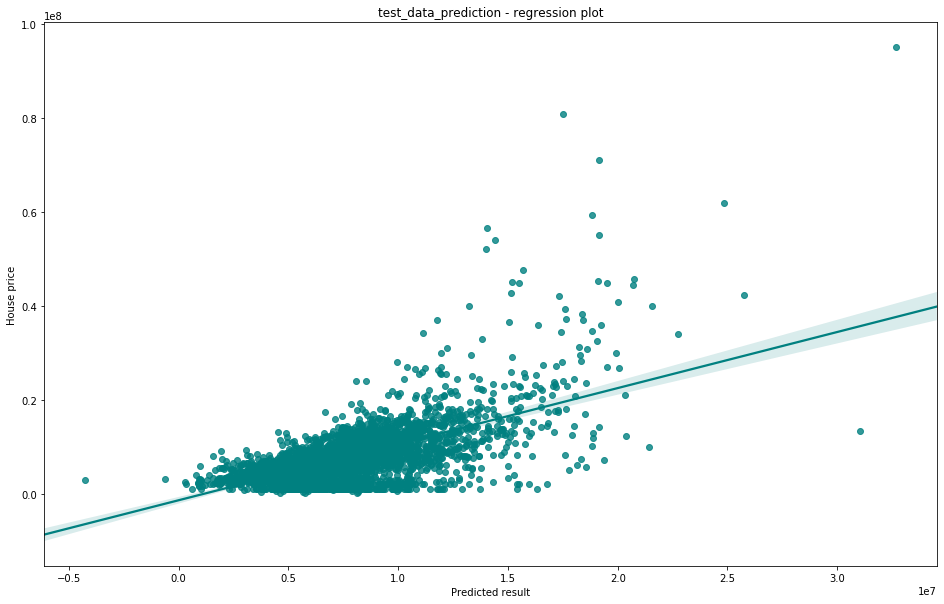

In [37]:
from sklearn.linear_model import LinearRegression

reg=LinearRegression()

#predict ytrain values
reg.fit(X_train,y_train)
y_test_pred=reg.predict(X_test)


plt.figure(figsize=(16,10))
sns.regplot(y_test_pred,y_test["price_doc"],color='teal', label = 'Integer')
plt.title("test_data_prediction - regression plot")
plt.xlabel("Predicted result")
plt.ylabel("House price")
plt.show()


In [38]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_test_pred)
print("r2 score: ", r2)

#Mean Squared Error
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_test_pred)
print("mse score: ", mse)

#Root Mean Squard Error
print("rmse score: ", np.sqrt(mse))

#Mean Absolute Error
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_test_pred)
print("mae score: ", mae)

r2 score:  0.42816913012357816
mse score:  14015808881028.512
rmse score:  3743769.3413227946
mae score:  2078249.8879113877


## Random Forest Regressor


/Users/harold/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


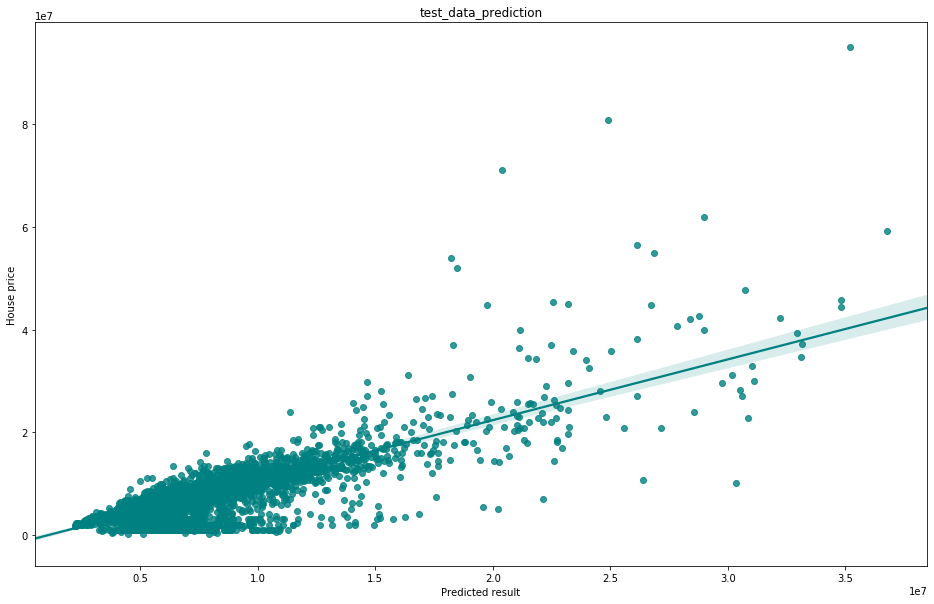

r2 score:  0.6493768581468564
mse score:  8593916845625.053
rmse score:  2931538.3070369475
mae score:  1478325.6346168579


In [39]:
from sklearn.ensemble import RandomForestRegressor # import the random forest model

model = RandomForestRegressor(n_estimators = 30, 
                              oob_score = True, 
                              max_features = 20,
                              min_samples_leaf = 8)
model.fit(X_train,y_train)



rfr_result = model.predict(X_test)
plt.figure(figsize=(16,10))
sns.regplot(rfr_result,y_test["price_doc"],color='teal', label = 'Integer')
plt.title("test_data_prediction")
plt.xlabel("Predicted result")
plt.ylabel("House price")
plt.show()

from sklearn.metrics import r2_score
r2 = r2_score(y_test, rfr_result)
print("r2 score: ", r2)

#Mean Squared Error
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, rfr_result)
print("mse score: ", mse)

#Root Mean Squard Error
print("rmse score: ", np.sqrt(mse))

print
#Mean Absolute Error
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, rfr_result)
print("mae score: ", mae)

## Support Vector Regressor


/Users/harold/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/harold/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


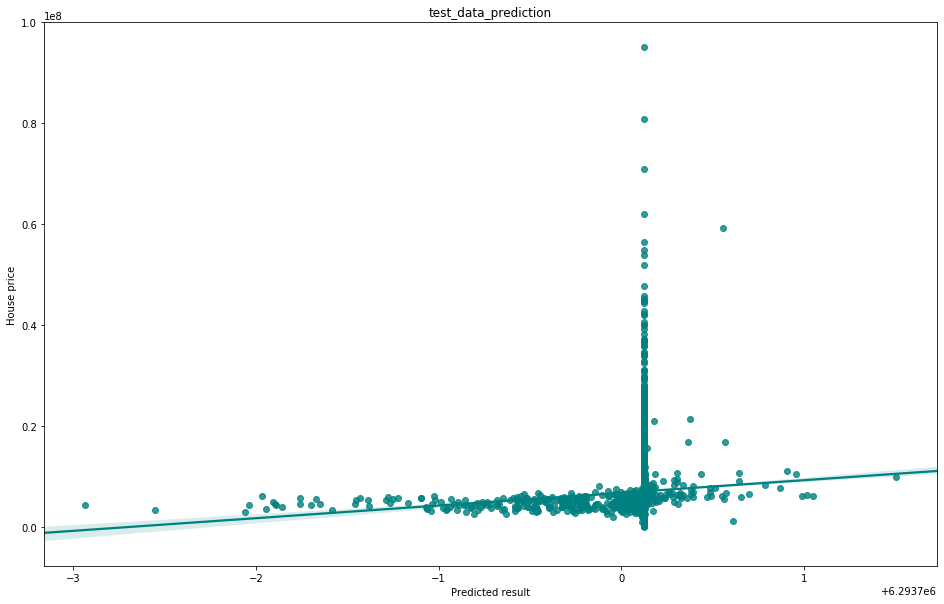

r2 score:  -0.02677792641129506
mse score:  25166747613589.887
rmse score:  5016647.048935164
mae score:  2798015.9623724334


In [40]:
from sklearn.svm import SVR

svr = SVR()
svr.fit(X_train, y_train)

svr_result = svr.predict(X_test)

plt.figure(figsize=(16,10))
sns.regplot(svr_result,y_test["price_doc"],color='teal', label = 'Integer')
plt.title("test_data_prediction")
plt.xlabel("Predicted result")
plt.ylabel("House price")
plt.show()

from sklearn.metrics import r2_score
r2 = r2_score(y_test, svr_result)
print("r2 score: ", r2)

#Mean Squared Error
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, svr_result)
print("mse score: ", mse)

#Root Mean Squard Error
print("rmse score: ", np.sqrt(mse))

#Mean Absolute Error
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, svr_result)
print("mae score: ", mae)

Fitting 2 folds for each of 9 candidates, totalling 18 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  18 out of  18 | elapsed:  7.0min finished


[15:44:52] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[15:44:52] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:45:33] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
0.6777795132202183
{'colsample_bytree': 0.7, 'learning_rate': 0.03, 'max_depth': 5, 'min_child_weight': 4, 'n_estimators': 500, 'nthread': 4, 'objective': 'reg:linear', 'silent': 1, 'subsample': 0.7}


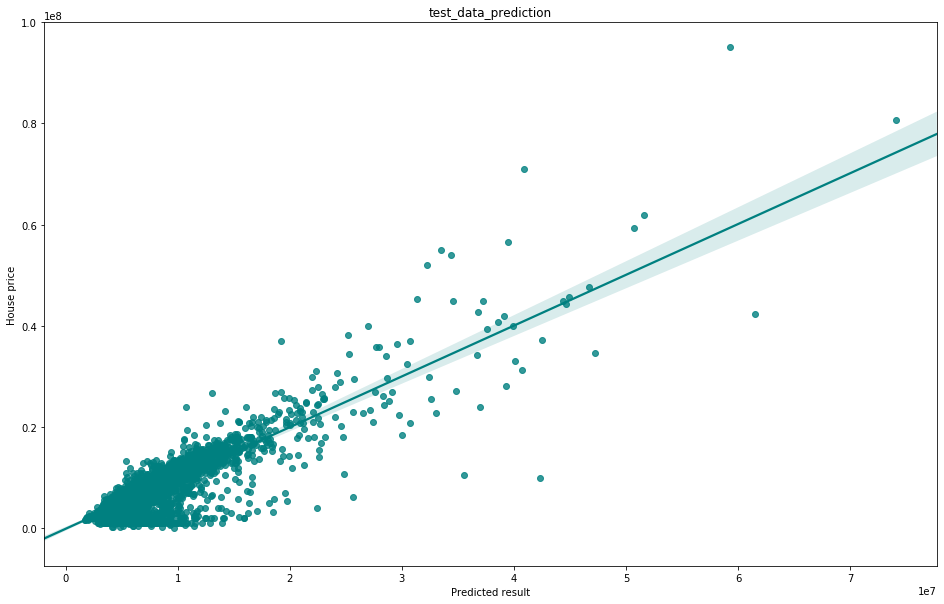

r2 score:  0.7475512876379622
mse score:  6187621359953.365
rmse score:  2487492.9869154133
mae score:  1380398.7979491386


In [41]:
from xgboost.sklearn import XGBRegressor

from sklearn.model_selection import GridSearchCV

xgb1 = XGBRegressor()
parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07], #so called `eta` value
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]}

xgb_grid = GridSearchCV(xgb1,
                        parameters,
                        cv = 2,
                        n_jobs = 5,
                        verbose=True)

xgb_grid.fit(X_train,
         y_train)
print(xgb_grid.best_score_)
print(xgb_grid.best_params_)

xgb_result = xgb_grid.predict(X_test)
plt.figure(figsize=(16,10))
sns.regplot(xgb_result,y_test["price_doc"],color='teal', label = 'Integer')
plt.title("test_data_prediction")
plt.xlabel("Predicted result")
plt.ylabel("House price")
plt.show()

from sklearn.metrics import r2_score
r2 = r2_score(y_test, xgb_result)
print("r2 score: ", r2)

#Mean Squared Error
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, xgb_result)
print("mse score: ", mse)

#Root Mean Squard Error
print("rmse score: ", np.sqrt(mse))

#Mean Absolute Error
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, xgb_result)
print("mae score: ", mae)


## Conclusion


According to the **rmse score** and **R2 score** The random forest regressor and XGBoost regressor with GridSearchCV have lower rmse and r2 score.
The xgboost model shows the best prediction performance. Support Vector regressor doesn't fit with these competition.
These dataset contains lower related variables, which shown by correlation. I dropped some variables before I start training models. It's possible to improve performance with these dropped value.

----

In [45]:
### Competition Result
result_rfr = model.predict(test_data)# Output based on Random Forest Model

result_xgb = xgb_grid.predict(test_data)# Output based on  XGBoost



**reference**:https://www.kaggle.com/jayatou/xgbregressor-with-gridsearchcv

**Contribution statement**\
Hao Wu conceived of the presented idea, developed the theory and performed the computations.
verified the analytical methods and contributed to the final manuscript.



In [54]:
result_csv = pd.DataFrame(data = test_data, columns =["id"])
temp = pd.DataFrame(data = result_xgb)

result_csv = pd.concat([result_csv,temp],axis = 1)
result_csv.columns =["id","price_doc"]
result_csv.to_csv("xgb_result.csv",index=False)

In [55]:
print(result_csv)

         id  price_doc
0     30474  5811138.5
1     30475  8612436.0
2     30476  6047940.0
3     30477  5680139.5
4     30478  5506314.5
...     ...        ...
7657  38131  8494128.0
7658  38132  5263512.5
7659  38133  5010116.0
7660  38134  5361578.5
7661  38135  8984294.0

[7662 rows x 2 columns]


In [56]:
result_csv.to_csv("xgb_result.csv",index=False)

In [57]:
result_csv1 = pd.DataFrame(data = test_data, columns =["id"])
temp = pd.DataFrame(data = result_rfr)

result_csv1 = pd.concat([result_csv1,temp],axis = 1)
result_csv1.columns =["id","price_doc"]
result_csv1.to_csv("rfr_result.csv",index=False)